In [ ]:
# import statements
import numpy as np
import pandas as pd

In [ ]:
# importing the data
from google.colab import files
uploaded = files.upload()
# data_1 = pd.read_csv('http://kaggle/input/higher-education-predictors-of-student-retention/dataset.csv')

Saving dataset.csv to dataset.csv


In [ ]:
for file in uploaded.keys():
  data_1 = pd.read_csv(file)
print(data_1.sample(5))

      Marital status  Application mode  Application order  Course  \
2922               2                12                  1      10   
884                1                 7                  2      12   
2749               2                12                  1      17   
4058               1                 1                  1       6   
988                1                 1                  1      10   

      Daytime/evening attendance  Previous qualification  Nacionality  \
2922                           1                      12            1   
884                            1                       1            1   
2749                           0                       1            1   
4058                           1                       1            1   
988                            1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
2922                      22                      27                 

In [ ]:
# Data Preprocessing
print(data_1.shape)

data_1.drop_duplicates()
data_1.dropna()

print(data_1.shape)

data_1['Target'] = data_1['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

(4424, 35)
(4424, 35)


In [ ]:
# Finding and reducing Class imbalance
print(data_1['Target'].value_counts())

2    2209
0    1421
1     794
Name: Target, dtype: int64


In [ ]:
# PCA transformation

y = data_1['Target']
X = data_1.drop(['Target'], axis=1)

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# n_components = 6

# pca = PCA(n_components=n_components).fit(X_resampled)

# for i in range(n_components):
#   print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

# data_pca = pca.fit_transform(X_resampled)
# fin_df_pca = pd.DataFrame(data_pca)

# print(fin_df_pca.sample(5))

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=42
)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Accuracy')

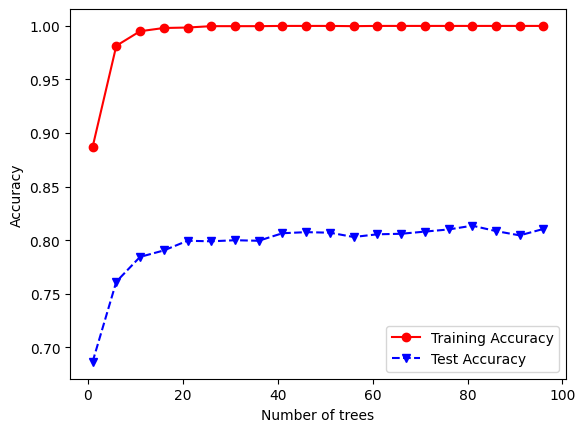

In [ ]:
# Random Forest method
from sklearn import ensemble
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy.random import random

# Finding optimal value for the n estimators
maxdepth = 3
n_trees = range(1, 101, 5)
trainAcc = []
testAcc = []
for n in n_trees:
  clf = ensemble.RandomForestClassifier(n_estimators=n)
  clf.fit(X_train, y_train)
  Y_predTrain = clf.predict(X_train)
  Y_predTest = clf.predict(X_test)
  trainAcc.append(accuracy_score(y_train, Y_predTrain))
  testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(n_trees, trainAcc, 'ro-', n_trees, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest
clf = ensemble.RandomForestClassifier(n_estimators=40)
clf = clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc = accuracy_score(y_train, Y_predTrain)
testAcc = accuracy_score(y_test, Y_predTest)

print('Accuracy on train data is %.3f' % (trainAcc))
print('Accuracy on test data is %.3f' % (testAcc))
precision = precision_score(y_test, Y_predTest, average='micro')

# Compute recall
recall = recall_score(y_test, Y_predTest, average='micro')
# Compute F1 score
f1score = f1_score(y_test, Y_predTest, average='micro')
# Print the metrics
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)



Accuracy on train data is 1.000
Accuracy on test data is 0.797
Precision:  0.7968828557063852
Recall:  0.7968828557063852
F1 Score:  0.7968828557063852


Text(0, 0.5, 'Accuracy')

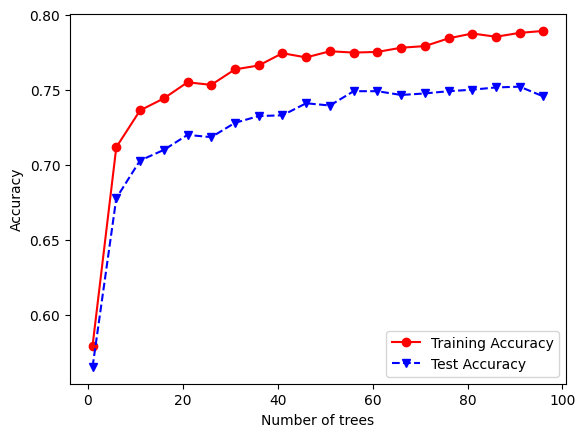

In [ ]:
# ADA boosting method
from sklearn.ensemble import AdaBoostClassifier

n_trees = range(1, 101, 5)
trainAcc = []
testAcc = []
for n in n_trees:
  clf_ada = AdaBoostClassifier(n_estimators=n)
  clf_ada.fit(X_train, y_train)
  Y_predTrain = clf_ada.predict(X_train)
  Y_predTest = clf_ada.predict(X_test)
  trainAcc.append(accuracy_score(y_train, Y_predTrain))
  testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(n_trees, trainAcc, 'ro-', n_trees, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')



In [ ]:
ada = AdaBoostClassifier(n_estimators=40, random_state=42)
# Train the model
ada.fit(X_train, y_train)

# Predict the test set classes using the trained model

y_pred_ada =  ada.predict(X_test)

print("The accuracy score for the ADA boost model is {}".format(round(accuracy_score(y_test, y_pred_ada), 2)))

precision = precision_score(y_test, y_pred_ada, average='micro')

# Compute recall
recall = recall_score(y_test, y_pred_ada, average='micro')
# Compute F1 score
f1score = f1_score(y_test, y_pred_ada, average='micro')
# Print the metrics
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

The accuracy score for the ADA boost model is 0.73
Precision:  0.7285067873303167
Recall:  0.7285067873303167
F1 Score:  0.7285067873303167


Text(0, 0.5, 'Accuracy')

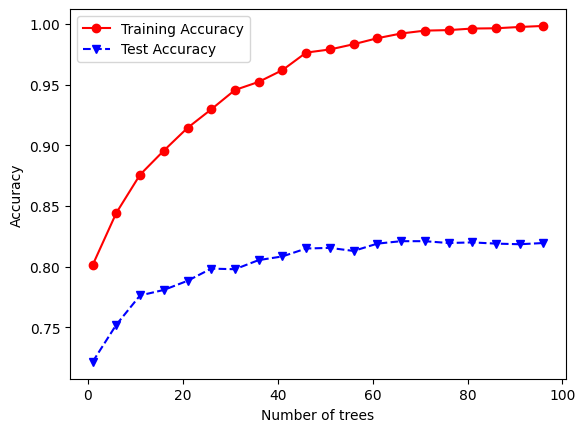

In [ ]:
# XG boosting method
import xgboost as xgb


n_trees = range(1, 101, 5)
trainAcc = []
testAcc = []
for n in n_trees:
  clf_xgb = xgb.XGBClassifier(n_estimators=n)
  clf_xgb.fit(X_train, y_train)
  Y_predTrain = clf_xgb.predict(X_train)
  Y_predTest = clf_xgb.predict(X_test)
  trainAcc.append(accuracy_score(y_train, Y_predTrain))
  testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(n_trees, trainAcc, 'ro-', n_trees, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')


In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=42)

model.fit(X_train, y_train)

y_pred_xg = model.predict(X_test)

print("The accuracy score for the XG boost boost model is {}".format(round(accuracy_score(y_test, y_pred_xg), 2)))
precision = precision_score(y_test, y_pred_xg, average='micro')

# Compute recall
recall = recall_score(y_test, y_pred_xg, average='micro')
# Compute F1 score
f1score = f1_score(y_test, y_pred_xg, average='micro')
# Print the metrics
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

The accuracy score for the XG boost boost model is 0.81
Precision:  0.8124685771744595
Recall:  0.8124685771744595
F1 Score:  0.8124685771744594


In [ ]:
### Nerual Network
#### CNN based approach 
###

import tensorflow as tf
from keras import layers, models
from keras.layers import LeakyReLU

# Define the model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(34, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/50
116/116 [==============================] - 3s 10ms/step - loss: 0.6053 - accuracy: 0.4075 - val_loss: 0.4754 - val_accuracy: 0.5097
Epoch 2/50
116/116 [==============================] - 1s 9ms/step - loss: 0.4795 - accuracy: 0.5129 - val_loss: 0.4398 - val_accuracy: 0.5463
Epoch 3/50
116/116 [==============================] - 1s 8ms/step - loss: 0.4621 - accuracy: 0.5278 - val_loss: 0.4498 - val_accuracy: 0.5377
Epoch 4/50
116/116 [==============================] - 1s 9ms/step - loss: 0.4583 - accuracy: 0.5332 - val_loss: 0.4416 - val_accuracy: 0.5442
Epoch 5/50
116/116 [==============================] - 1s 9ms/step - loss: 0.4557 - accuracy: 0.5332 - val_loss: 0.4428 - val_accuracy: 0.5474
Epoch 6/50
116/116 [==============================] - 1s 9ms/step - loss: 0.4502 - accuracy: 0.5391 - val_loss: 0.4344 - val_accuracy: 0.5560
Epoch 7/50
116/116 [==============================] - 1s 9ms/step - loss: 0.4460 - accuracy: 0.5450 - val_loss: 0.4282 - val_accuracy: 0.5528
Epoch

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    # Add input layer
    model.add(layers.Input(shape=(34,)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 32, 256, 32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, 0.1)))

    # Add output layer
    model.add(layers.Dense(units=1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model with the chosen hyperparameters
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='student_dropout_prediction')

In [ ]:
tuner.search(X_train, y_train, epochs=30, validation_split=0.2)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]

Trial 20 Complete [00h 00m 34s]
val_accuracy: 0.5718390742937723

Best val_accuracy So Far: 0.5754310488700867
Total elapsed time: 00h 09m 15s


In [ ]:
# Build the model with the best hyperparameters
model = build_model(best_hp)

# Train the model with the best hyperparameters
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
116/116 [==============================] - 1s 4ms/step - loss: 0.5981 - accuracy: 0.4143 - val_loss: 0.4749 - val_accuracy: 0.5086
Epoch 2/100
116/116 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.5078 - val_loss: 0.4426 - val_accuracy: 0.5399
Epoch 3/100
116/116 [==============================] - 0s 4ms/step - loss: 0.4657 - accuracy: 0.5194 - val_loss: 0.4333 - val_accuracy: 0.5506
Epoch 4/100
116/116 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.5302 - val_loss: 0.4279 - val_accuracy: 0.5474
Epoch 5/100
116/116 [==============================] - 0s 4ms/step - loss: 0.4496 - accuracy: 0.5340 - val_loss: 0.4286 - val_accuracy: 0.5506
Epoch 6/100
116/116 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.5423 - val_loss: 0.4281 - val_accuracy: 0.5539
Epoch 7/100
116/116 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.5474 - val_loss: 0.4247 - val_accuracy: 0.5571

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.5546
Test accuracy: 0.554550051689148


In [ ]:
###########
# RNN based approach
###########

def build_model_rnn(hp):
    model = keras.Sequential()

    # Add input layer
    model.add(layers.Input(shape=(X_train.shape[1], 1)))

    # Tune the number of LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        # Tune the number of LSTM units in each layer
        model.add(layers.LSTM(units=hp.Int(f'units_{i}', 32, 256, 32), return_sequences=True))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, 0.1)))

    # Flatten output and add dense layers
    model.add(layers.Flatten())
    for i in range(hp.Int('num_dense_layers', 1, 4)):
        # Tune the number of units in each dense layer
        model.add(layers.Dense(units=hp.Int(f'dense_units_{i}', 32, 256, 32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dense_dropout_{i}', 0.0, 0.5, 0.1)))

    # Add output layer
    model.add(layers.Dense(units=1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model with the chosen hyperparameters
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    return model

tuner_rnn = RandomSearch(
    build_model_rnn,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='student_dropout_prediction')


In [ ]:
tuner_rnn.search(X_train, y_train, epochs=30, validation_split=0.2)

# Get the best hyperparameters
best_hp_rnn = tuner_rnn.get_best_hyperparameters(1)[0]

In [ ]:
# Build the model with the best hyperparameters
model_rnn = build_model_rnn(best_hp_rnn)

# Train the model with the best hyperparameters
model_rnn.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
116/116 [==============================] - 11s 52ms/step - loss: 0.5898 - accuracy: 0.4337 - val_loss: 0.5121 - val_accuracy: 0.4978
Epoch 2/100
116/116 [==============================] - 6s 55ms/step - loss: 0.5165 - accuracy: 0.4814 - val_loss: 0.4878 - val_accuracy: 0.5075
Epoch 3/100
116/116 [==============================] - 5s 43ms/step - loss: 0.4961 - accuracy: 0.4957 - val_loss: 0.4702 - val_accuracy: 0.5226
Epoch 4/100
116/116 [==============================] - 5s 47ms/step - loss: 0.4878 - accuracy: 0.5062 - val_loss: 0.4688 - val_accuracy: 0.5366
Epoch 5/100
116/116 [==============================] - 6s 54ms/step - loss: 0.4832 - accuracy: 0.5111 - val_loss: 0.4617 - val_accuracy: 0.5216
Epoch 6/100
116/116 [==============================] - 5s 44ms/step - loss: 0.4768 - accuracy: 0.5159 - val_loss: 0.4551 - val_accuracy: 0.5248
Epoch 7/100
116/116 [==============================] - 6s 53ms/step - loss: 0.4714 - accuracy: 0.5199 - val_loss: 0.4464 - val_accuracy

In [ ]:
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

63/63 [==============================] - 2s 17ms/step - loss: 0.4704 - accuracy: 0.5490
Test accuracy: 0.5490196347236633


In [ ]:
# Insights

data_1.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

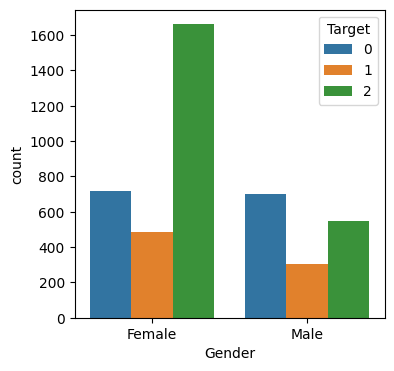

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
sns.countplot(data=data_1, x='Gender', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

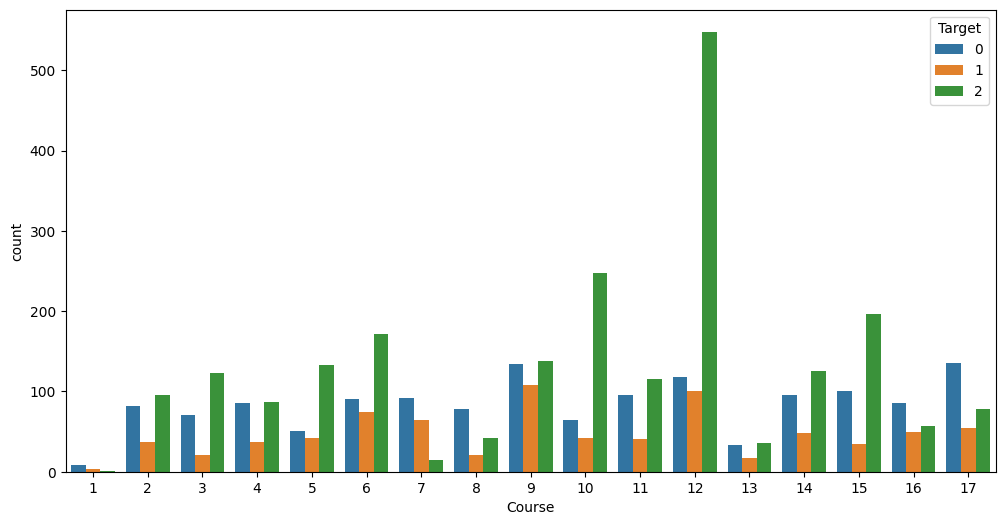

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_1, x='Course', hue='Target')
plt.show()

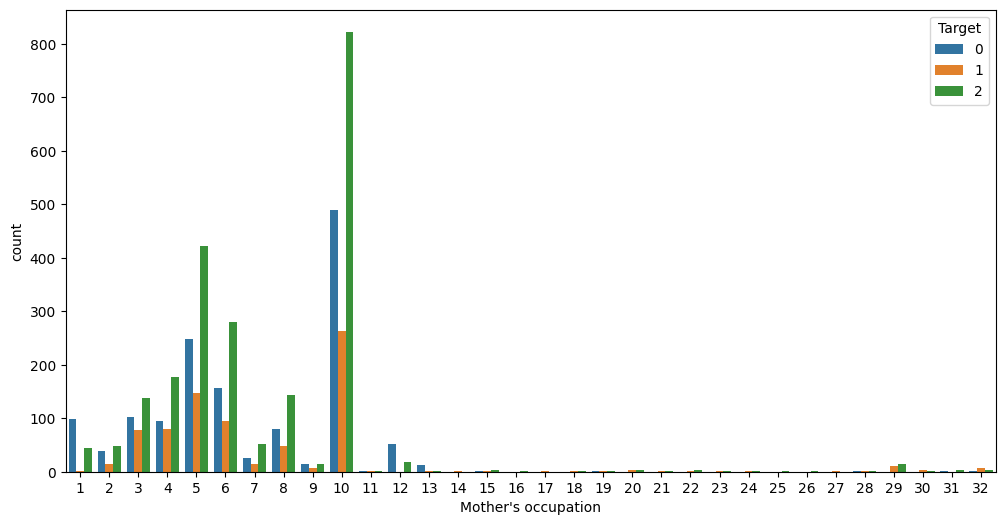

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_1, x="Mother's occupation", hue='Target')
plt.show()

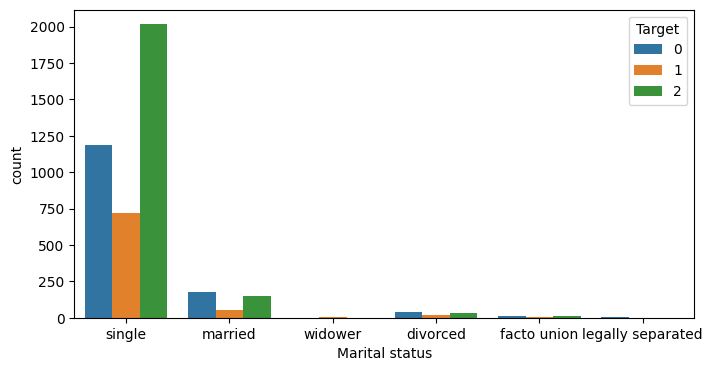

In [ ]:
# Marital Status based Insights

plt.figure(figsize=(8,4))
sns.countplot(data=data_1, x='Marital status', hue='Target')
plt.xticks(ticks=range(6), labels=['single', 'married', 'widower', 'divorced', 'facto union', 'legally separated'])
plt.show()

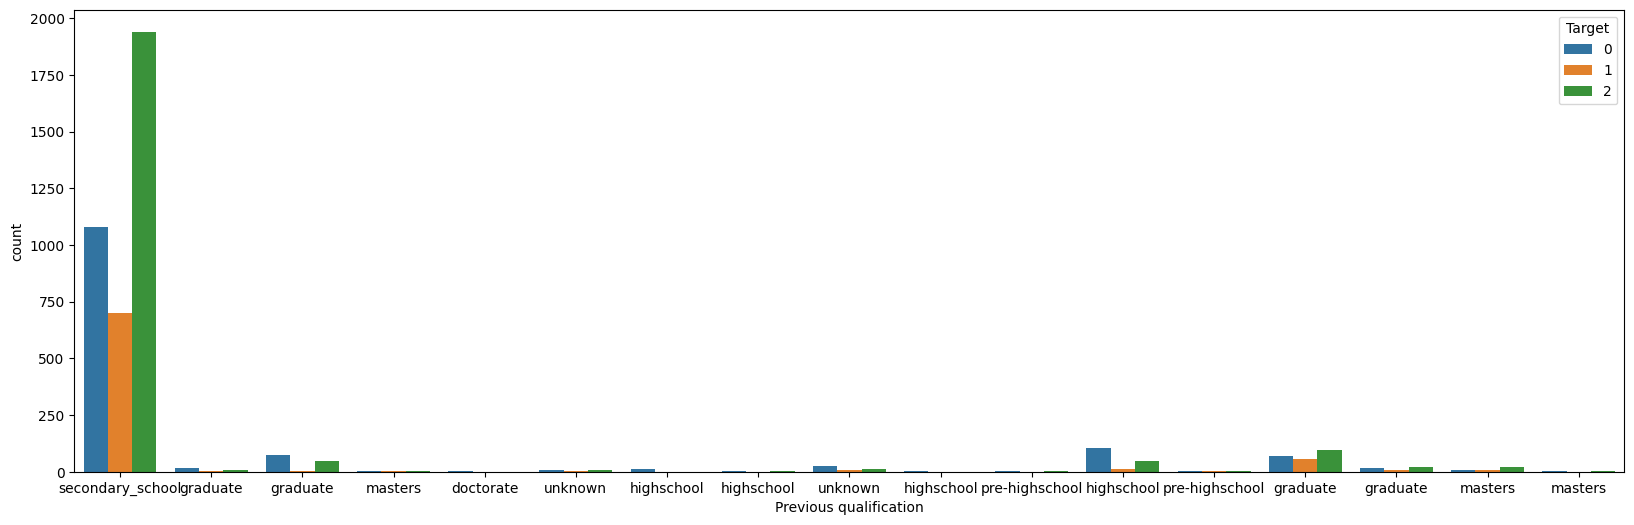

In [ ]:
prev_qual_labels = ['secondary_school', 'graduate', 'graduate', 'masters', 'doctorate', 'unknown', 'highschool', 'highschool', 'unknown', 'highschool', 'pre-highschool', 'highschool', 'pre-highschool', 'graduate', 'graduate', 'masters', 'masters']
plt.figure(figsize=(20,6))
sns.countplot(data=data_1, x="Previous qualification", hue='Target')
plt.xticks(ticks=range(len(prev_qual_labels)), labels=prev_qual_labels)
plt.show()